## WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.


Observations:  

Observation 1: Southern Hemisphere climates tend to be slightly milder than those at similar latitudes in the Northern Hemisphere. This is because the Southern Hemisphere has significantly more ocean and much less land; water heats up and cools down more slowly than land.

Observation 2: Highest temperature is found at 0 latitude and as the latidude increases or decreases, temperature drops. This happens as equatorial region receives sunlight straight with less or no angle due to curvature shape of earth.

Observation 3: Latitude doesn't have a strong iinfluence on wind speed. The speed of the wind is controlled by the strength of the air pressure gradient, the stronger the pressure gradient the higher the wind speed.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
print("Beginning Data Retrieval ")
print("-----------------------------")

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 



# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
  
  

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Beginning Data Retrieval
-------------------------------
Processing Record 1 | Nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=nikolskoye
Processing Record 2 | North Bend
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=north bend
Processing Record 3 | Bilibino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=bilibino
Processing Record 4 | Atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=atuona
Processing Record 5 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=punta arenas
Processing Record 6 | Mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=mataura
Processing Record 7

Processing Record 56 | Kumul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=hami
Processing Record 57 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=rikitea
Processing Record 58 | Lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=lagoa
Processing Record 59 | Agadez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=agadez
Processing Record 60 | Coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=coquimbo
City not found. Skipping...
Processing Record 61 | Tura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=tura
City not found. Skipping...
Processing Record 62 | Eyl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b9037100

Processing Record 111 | Izhma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=izhma
Processing Record 112 | Pochutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=pochutla
Processing Record 113 | Kandi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=kandi
Processing Record 114 | Rosetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=rosetown
Processing Record 115 | Zelenoborskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=zelenoborskiy
Processing Record 116 | Brigantine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=brigantine
Processing Record 117 | Weligama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef1

Processing Record 166 | Kupang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=kupang
Processing Record 167 | Berdigestyakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=berdigestyakh
Processing Record 168 | Port Macquarie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=port macquarie
Processing Record 169 | Staryy Nadym
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=staryy nadym
Processing Record 170 | Salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=salalah
Processing Record 171 | Torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=torbay
Processing Record 172 | Lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90

Processing Record 221 | Yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=yulara
Processing Record 222 | Bontang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=bontang
Processing Record 223 | Lewisporte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=lewisporte
Processing Record 224 | Saint-Joseph
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=saint-joseph
Processing Record 225 | Paamiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=paamiut
Processing Record 226 | Meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=meulaboh
Processing Record 227 | Cobija
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef1

Processing Record 277 | Alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=alofi
Processing Record 278 | Kindersley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=kindersley
Processing Record 279 | Jumla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=jumla
Processing Record 280 | Toora-Khem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=toora-khem
Processing Record 281 | Chengde
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=chengde
Processing Record 282 | Bojonegoro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=bojonegoro
Processing Record 283 | Sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q

Processing Record 334 | Turukhansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=turukhansk
City not found. Skipping...
Processing Record 335 | Šahy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=sahy
Processing Record 336 | Gouyave
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=gouyave
Processing Record 337 | Ridgecrest
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=ridgecrest
Processing Record 338 | Altagracia de Orituco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=altagracia de orituco
Processing Record 339 | Port Hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=port hardy
Processing Record 340 | Kingston
http://api.openweathermap.org/data/2.5/we

Processing Record 389 | Tocantins
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=tocantins
City not found. Skipping...
Processing Record 390 | Buluang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=buluang
Processing Record 391 | Yārāda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=yarada
Processing Record 392 | Ji’an
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=jian
Processing Record 393 | Nizhniy Tsasuchey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=nizhniy tsasuchey
Processing Record 394 | Biltine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=biltine
Processing Record 395 | Zaraza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

Processing Record 443 | Villa Bisonó
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=villa bisono
Processing Record 444 | Puerto Escondido
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=puerto escondido
Processing Record 445 | Araouane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=araouane
Processing Record 446 | Winnemucca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=winnemucca
Processing Record 447 | Empalme
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=empalme
Processing Record 448 | Henties Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=henties bay
Processing Record 449 | Sankheda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

Processing Record 498 | Nyurba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=nyurba
Processing Record 499 | Philadelphia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=filadelfia
Processing Record 500 | Broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=broome
Processing Record 501 | Shiyan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=shiyan
Processing Record 502 | Vallenar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=vallenar
Processing Record 503 | Rumford
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=rumford
Processing Record 504 | Coolum Beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&

Processing Record 553 | Mitsamiouli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=mitsamiouli
Processing Record 554 | Coyhaique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=coihaique
Processing Record 555 | Greymouth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=greymouth
Processing Record 556 | Port Moresby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=port moresby
Processing Record 557 | Amazar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=amazar
Processing Record 558 | Anadyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966f8a0ef16c6e5&q=anadyr
Processing Record 559 | College
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90d9b90371006595f966

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:

# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name,
                "Cloudiness" : cloudiness,
                "Country" : country,
                "Date" : date,
                "Humidity" : humidity,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Wind Speed" : wind_speed
})

weather_dict.count()

City          561
Cloudiness    561
Country       561
Date          561
Humidity      561
Lat           561
Lng           561
Max Temp      561
Wind Speed    561
dtype: int64

In [8]:
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nikolskoye,75,RU,1595758252,55,59.70,30.79,66.99,11.18
1,North Bend,1,US,1595758254,100,43.41,-124.22,54.00,4.70
2,Bilibino,7,RU,1595758255,48,68.05,166.44,72.97,7.67
3,Atuona,4,PF,1595758256,73,-9.80,-139.03,79.75,21.18
4,Punta Arenas,100,CL,1595758257,86,-53.15,-70.92,32.00,25.28
...,...,...,...,...,...,...,...,...,...
556,Amazar,93,RU,1595758982,62,53.86,120.88,77.09,8.34
557,Anadyr,60,RU,1595758983,82,64.75,177.48,62.60,11.18
558,College,40,US,1595758985,87,64.86,-147.80,53.60,4.70
559,Teknāf,97,BD,1595758987,73,20.86,92.31,86.25,9.51


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [37]:
# Save data frame to CSV
weather_dict.to_csv('../Output_data/weather_data.csv')

# Display data frame head 
weather_dict.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nikolskoye,75,RU,1595758252,55,59.70,30.79,66.99,11.18
1,North Bend,1,US,1595758254,100,43.41,-124.22,54.00,4.70
2,Bilibino,7,RU,1595758255,48,68.05,166.44,72.97,7.67
3,Atuona,4,PF,1595758256,73,-9.80,-139.03,79.75,21.18
4,Punta Arenas,100,CL,1595758257,86,-53.15,-70.92,32.00,25.28


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

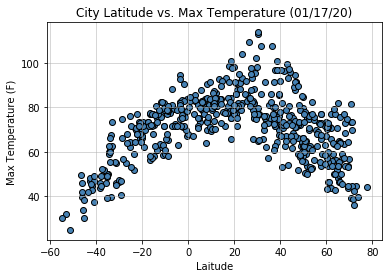

In [15]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

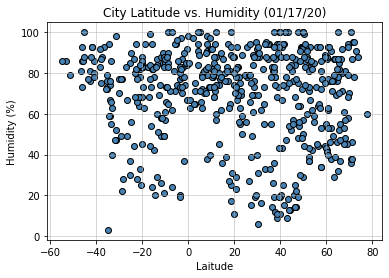

In [16]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

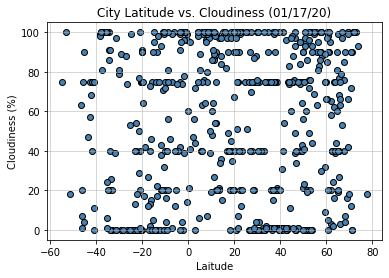

In [17]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

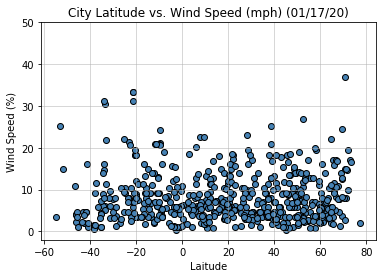

In [18]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [27]:
# OPTIONAL: Create a function to create Linear Regression plots

from scipy import stats

def linear_agression(x,y):
    print(f"The r-squared is : {round(stats.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [28]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.59


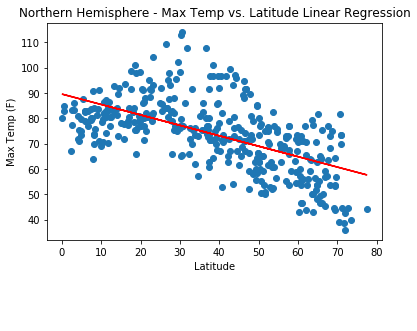

In [29]:
#Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.83


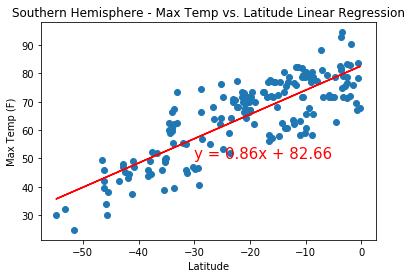

In [30]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.1


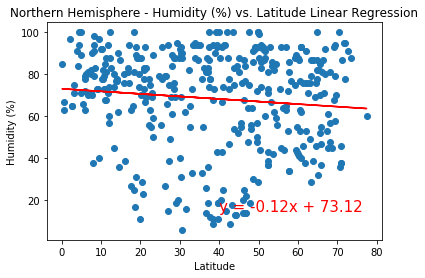

In [31]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.06


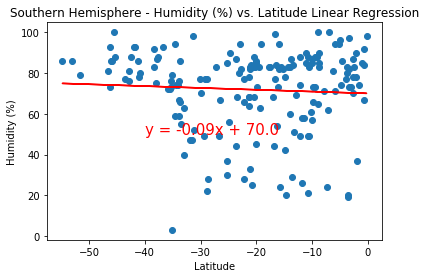

In [32]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.04


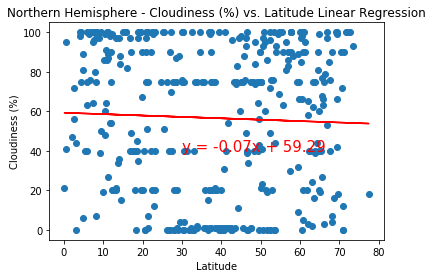

In [33]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.08


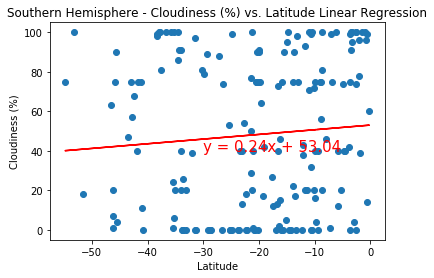

In [34]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.08


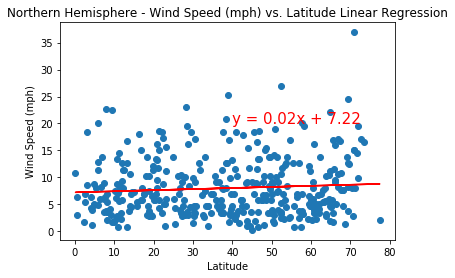

In [35]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.02


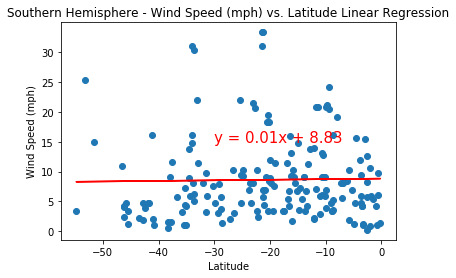

In [36]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")